# Library & Dataset

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

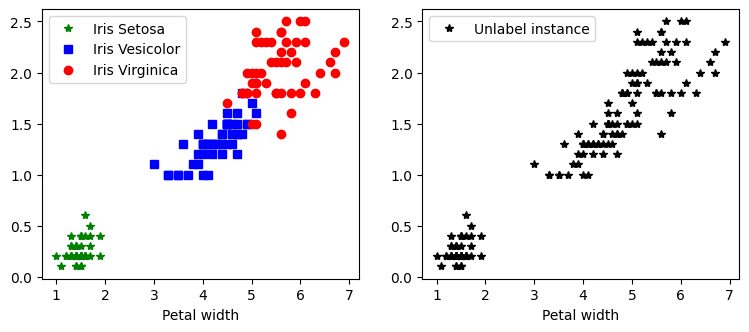

In [ ]:
iris = load_iris() # We will use the iris dataset without its labels
X = iris.data[:, 2:]
y = iris.target
plt.figure(figsize=(9, 3.5))
plt.subplot(121,)
plt.plot(X[y==0,0], X[y==0,1], "g*", label="Iris Setosa")
plt.plot(X[y==1,0], X[y==1,1], "bs", label="Iris Vesicolor")
plt.plot(X[y==2,0], X[y==2,1], "ro", label="Iris Virginica")
plt.xlabel("Petal length", fontsize=10)
plt.xlabel("Petal width", fontsize=10)
plt.legend(fontsize=10)
plt.subplot(122,)
plt.plot(X[:,0], X[:,1], "k*", label="Unlabel instance")
plt.xlabel("Petal length", fontsize=10)
plt.xlabel("Petal width", fontsize=10)
plt.legend(fontsize=10)
plt.show()

# K Mean Clustering From Scratch

In [ ]:
# First, we will create a helper function to calculate the Euclidean distance between two points.
def euclidean(point, centroid):
  return np.sqrt(np.sum((point - centroid) ** 2))

In [ ]:
def showplot(centroids):
  plt.figure(figsize=(9, 3.5))
  plt.plot(X[:,0], X[:,1], "k*", label="Unlabel instance")
  plt.plot([x for x, _ in centroids],[y for _, y in centroids], '+', markersize=10,)
  plt.xlabel("Petal length", fontsize=10)
  plt.xlabel("Petal width", fontsize=10)
  plt.legend(fontsize=10)
  plt.show()

In [ ]:
# Next, we need a way to initialize the starting point of each centroid.
# We will calculate it by uniformly distributing each centroid in the graph.
from numpy.random import uniform
import numpy as np

n_clusters = 3 # The data set have 3 class hench 3 cluster centroids we need to make

minpoint, maxpoint = np.min(X[:,:], axis=0), np.max(X[:,:], axis=0)
centroids = np.array([uniform(low=minpoint, high=maxpoint) for _ in range(n_clusters)])
print(minpoint, maxpoint)
print(centroids)

[1.  0.1] [6.9 2.5]
[[2.80160241 0.16818773]
 [1.19313616 1.42768664]
 [6.29629042 1.06146197]]


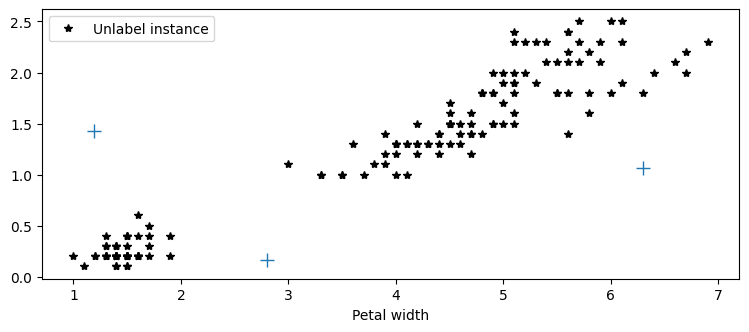

In [ ]:
showplot(centroids)

In [ ]:
def showplotwithclass(sorted_x, centroids):
    plt.figure(figsize=(9, 3.5))

    colors = plt.cm.tab20.colors

    for i, cluster_points in enumerate(sorted_x):
        if len(cluster_points) == 0:  # Skip empty clusters
            continue
        cluster_points = np.array(cluster_points)
        plt.plot(cluster_points[:, 0], cluster_points[:, 1],
                 marker='o', linestyle='', color=colors[i % len(colors)],
                 label=f"Class {i + 1} instances")

    plt.plot([x for x, _ in centroids],
             [y for _, y in centroids],
             'k+', markersize=10, label="Centroids")

    plt.xlabel("Petal length", fontsize=10)
    plt.ylabel("Petal width", fontsize=10)
    plt.legend(fontsize=10)
    plt.show()

In [ ]:
def calculateClass(X, centroids):
  sorted_x = [[] for _ in range(n_clusters)]  # Independent lists
  for x in X:
    dists = [euclidean(x, centroid) for centroid in centroids]
    centroid_idx = np.argmin(dists)
    sorted_x[centroid_idx].append(x)

  sorted_x = [np.array(cluster) for cluster in sorted_x]

  showplotwithclass(sorted_x, centroids)
  return sorted_x

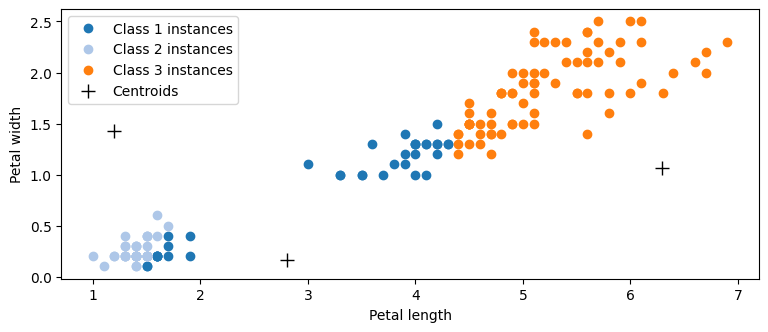

In [ ]:
res = calculateClass(X, centroids)

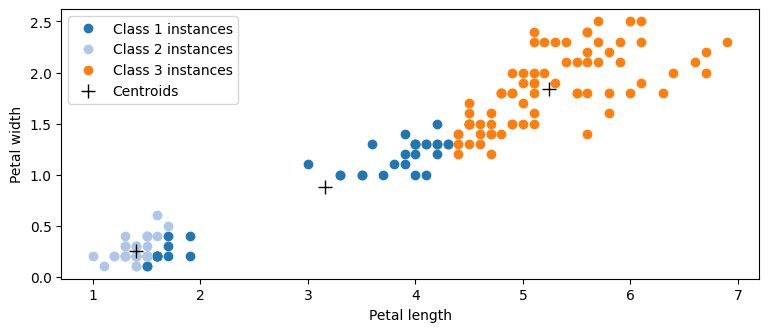

In [ ]:
# After that, we use the result to adjust the current centroid.
# Reassign centroids as the mean of the points belonging to them.
def adjustCentroid(sorted_x, centroids):
  prev_centroids = centroids
  centroids = [np.mean(cluster, axis=0) for cluster in sorted_x]
  for i, centroid in enumerate(centroids):
    if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
      centroids[i] = prev_centroids[i]

  showplotwithclass(sorted_x, centroids)
  return centroids
res = adjustCentroid(res, centroids)

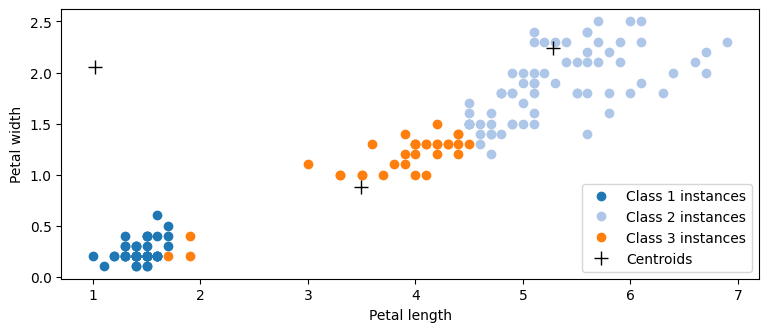

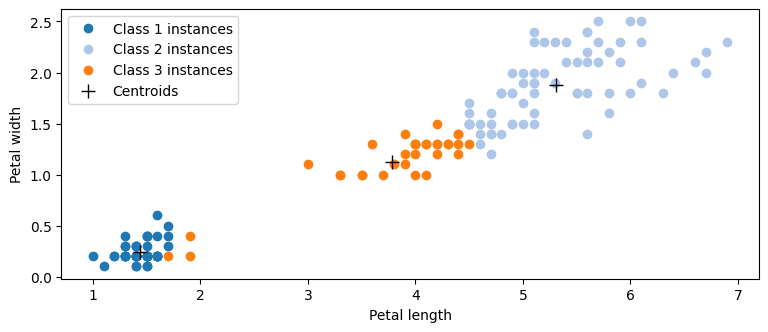

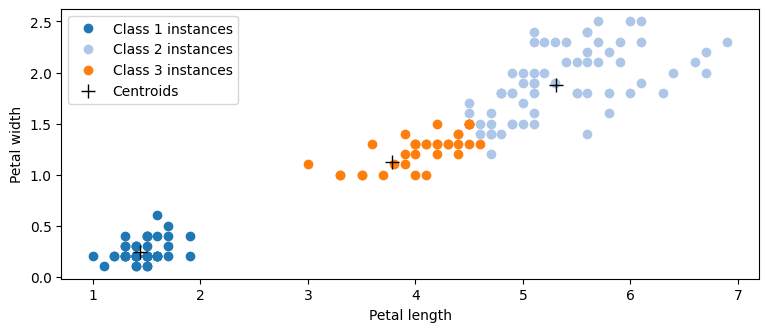

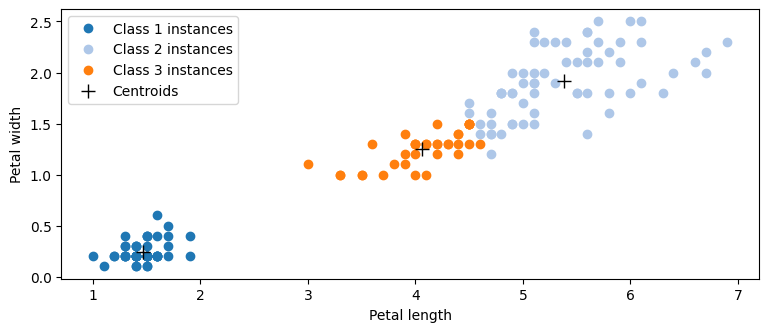

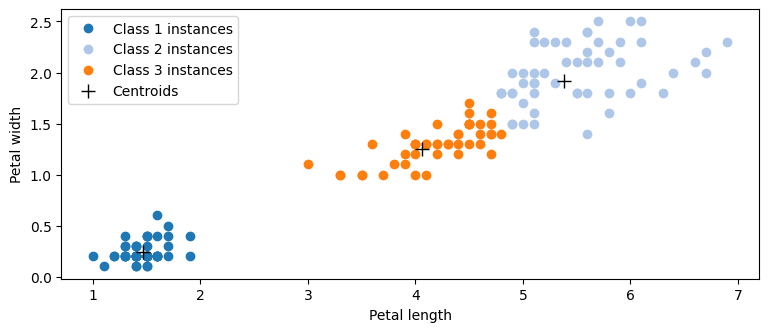

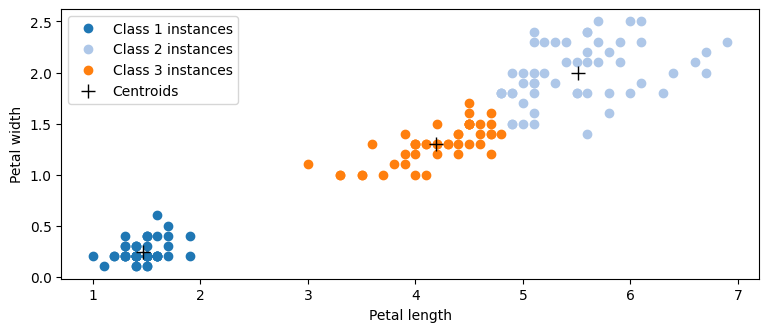

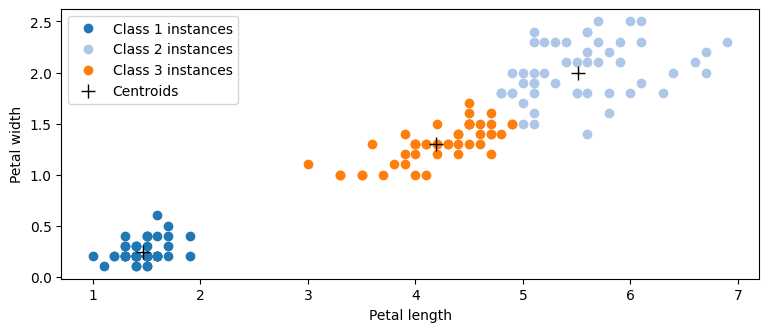

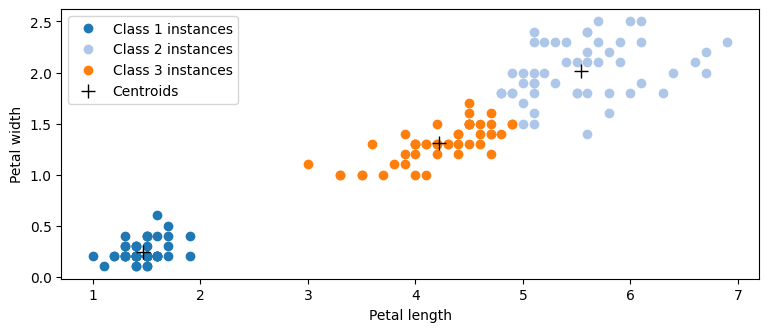

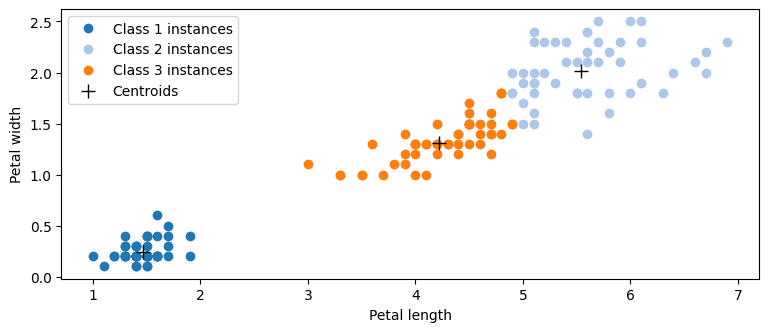

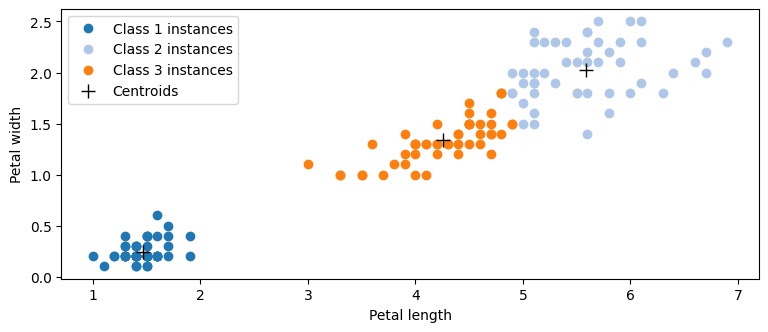

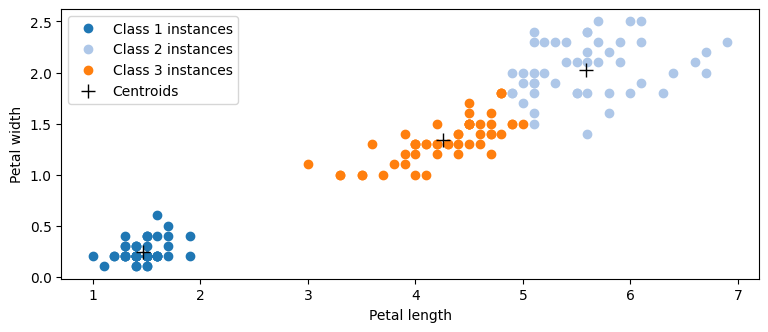

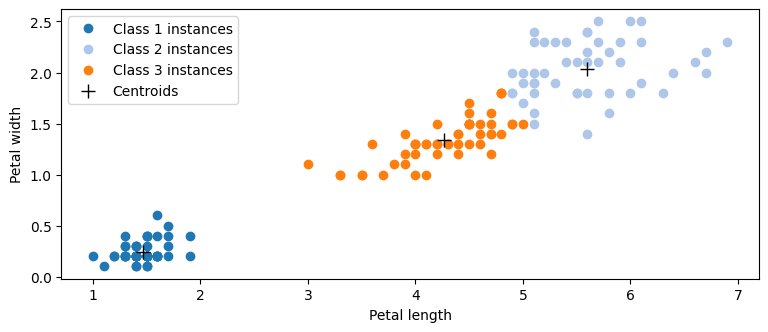

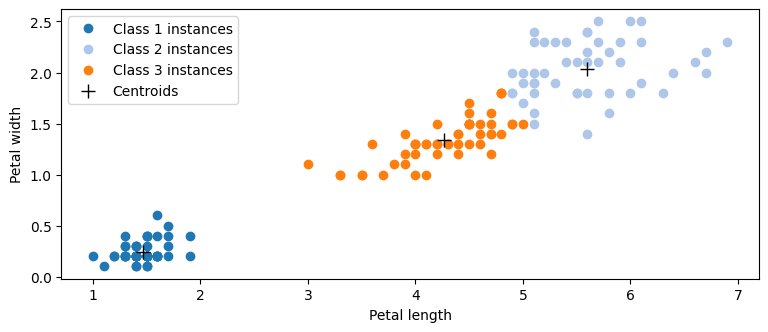

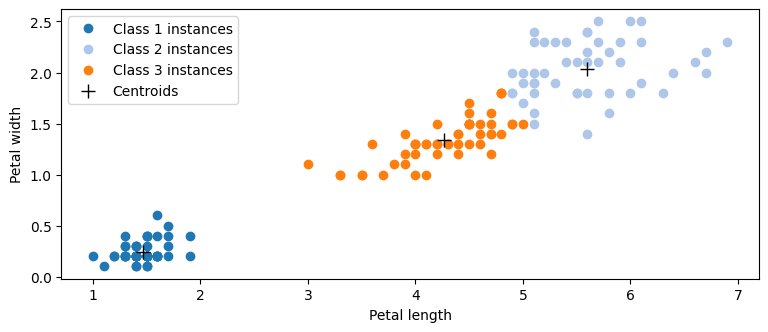

In [ ]:
# We will create a computation loop like this.
def train(X, n_clusters):
  minpoint, maxpoint = np.min(X[:,:], axis=0), np.max(X[:,:], axis=0)
  centroids = np.array([uniform(low=minpoint, high=maxpoint) for _ in range(n_clusters)])
  while True:
    sorted_x = calculateClass(X, centroids)
    new_centroid = adjustCentroid(sorted_x, centroids)
    if np.allclose(centroids, new_centroid): break
    centroids = new_centroid
train(X, 3)

# K Mean CLustering From SciKitLearn API

In [ ]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3)  #3 kinds of Iris flowers
y_pred= kmeans.fit_predict(X)

print(y_pred, "\n",kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


In [ ]:
import numpy as np
X_new= np.array([[1.9, 1.25], [5.05, 2.37]])
kmeans.predict(X_new)

array([0, 1], dtype=int32)

In [ ]:
print(type(kmeans))
kmeans.transform(X_new)

<class 'sklearn.cluster._kmeans.KMeans'>


array([[1.09538121, 3.77880143, 2.37102829],
       [4.16954674, 0.63913244, 1.29064018]])

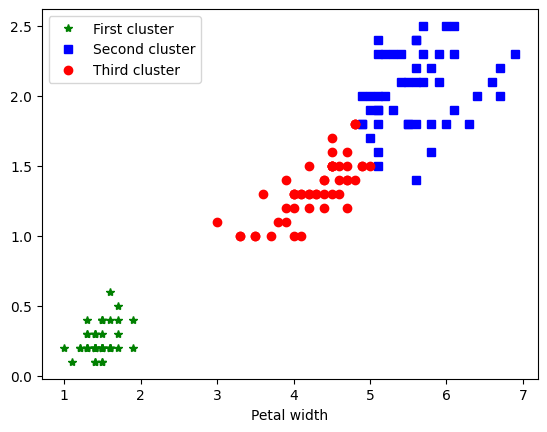

In [ ]:
plt.plot(X[y_pred==0,0], X[y_pred==0,1], "g*", label="First cluster")
plt.plot(X[y_pred==1,0], X[y_pred==1,1], "bs", label="Second cluster")
plt.plot(X[y_pred==2,0], X[y_pred==2,1], "ro", label="Third cluster")
plt.xlabel("Petal length", fontsize=10)
plt.xlabel("Petal width", fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# inertia method to observe squared distance between cluster instances and centroid
kmeans.inertia_

31.371358974358966

In [ ]:
# improving with n_initial
kmeans_improved = KMeans(n_clusters=3, n_init=10)
y_pred_imp = kmeans_improved.fit_predict(X)
kmeans_improved.inertia_

31.371358974358966

# K-Means Clustering usage on the penguins dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download parulpandey/palmer-archipelago-antarctica-penguin-data
! unzip palmer-archipelago-antarctica-penguin-data.zip

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data
License(s): CC0-1.0
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 15.6MB/s]
Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
  inflating: penguins_size.csv       


In [ ]:
import pandas as pd
penguins = pd.read_csv('penguins_size.csv').dropna()

X = penguins.drop(['species','island','sex'], axis=1)
y = penguins.species.astype('category').cat.codes
y.unique()

penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


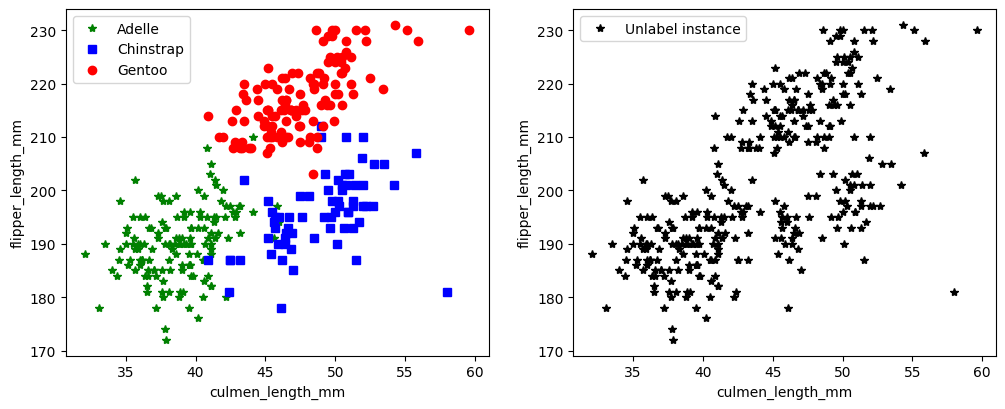

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
plt.subplot(122,)
plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3)  #3 kinds of Iris flowers
X['cluster']= kmeans.fit_predict(X)
X
# print(y_pred, "\n",kmeans.labels_)
# print(kmeans.cluster_centers_)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,2
340,46.8,14.3,215.0,4850.0,2
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,0


In [ ]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

28525979.41375211
[[  49.05         15.56617647  220.76470588 5449.63235294]
 [  41.2863354    18.03726708  190.08695652 3522.04968944]
 [  44.87238095   16.84857143  204.98095238 4459.04761905]]


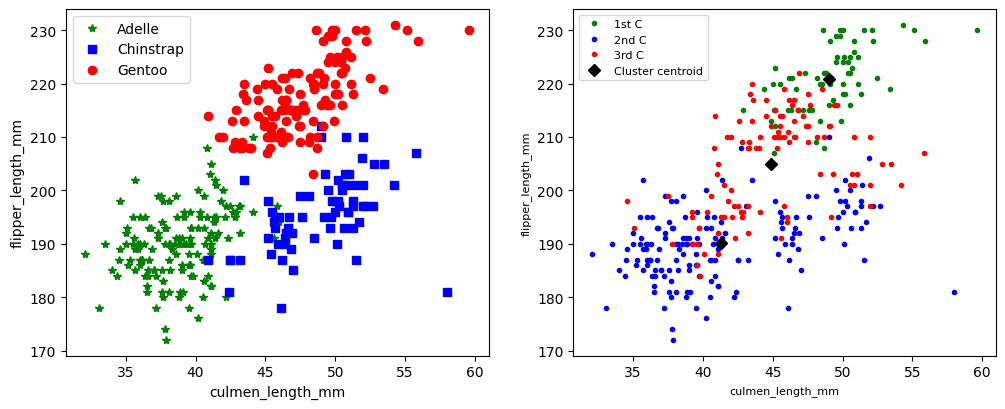

In [ ]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
# plt.subplot(122,)
# plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
# plt.xlabel("culmen_length_mm", fontsize=10)
# plt.ylabel("flipper_length_mm", fontsize=10)
# plt.legend(fontsize=10)
#cluster inferencing
plt.subplot(122,)
plt.plot(X[X['cluster']==0]['culmen_length_mm'], X[X['cluster']==0]['flipper_length_mm'], "g.", label="1st C")
plt.plot(X[X['cluster']==1]['culmen_length_mm'], X[X['cluster']==1]['flipper_length_mm'], "b.", label="2nd C")
plt.plot(X[X['cluster']==2]['culmen_length_mm'], X[X['cluster']==2]['flipper_length_mm'], "r.", label="3rd C")
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], 'kD', label='Cluster centroid')
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

In [ ]:
X_sel = X[['culmen_length_mm','flipper_length_mm']]
kmeans_sel = KMeans(n_clusters=3, n_init=50)
X_sel['cluster'] = kmeans_sel.fit_predict(X_sel)
X_sel

<ipython-input-24-dec63f65a4b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sel['cluster'] = kmeans_sel.fit_predict(X_sel)


,culmen_length_mm,flipper_length_mm,cluster
0,39.1,181.0,1
1,39.5,186.0,1
2,40.3,195.0,2
4,36.7,193.0,1
5,39.3,190.0,1
...,...,...,...
338,47.2,214.0,0
340,46.8,215.0,0
341,50.4,222.0,0
342,45.2,212.0,0


In [ ]:
print(kmeans_sel.inertia_)
print(kmeans_sel.cluster_centers_)

13868.78619215541
[[ 47.6248     217.        ]
 [ 38.45304348 187.05217391]
 [ 45.94574468 196.84042553]]


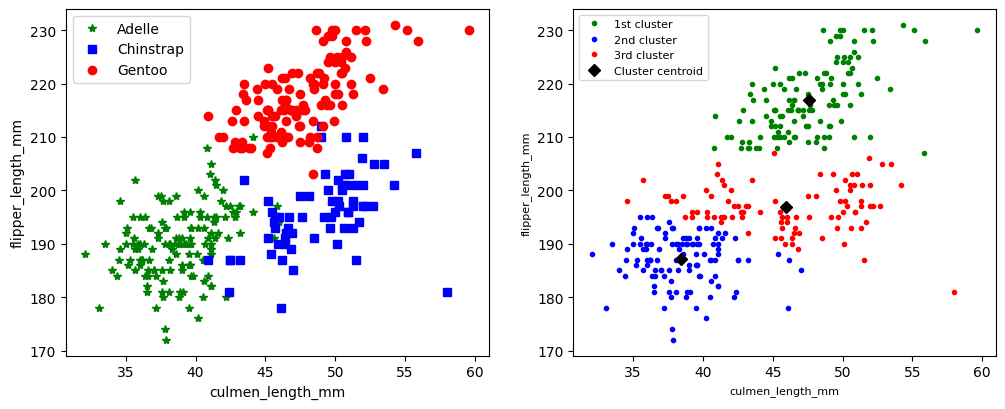

In [ ]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X_sel[y==0]['culmen_length_mm'], X_sel[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X_sel[y==1]['culmen_length_mm'], X_sel[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X_sel[y==2]['culmen_length_mm'], X_sel[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
# plt.subplot(122,)
# plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
# plt.xlabel("culmen_length_mm", fontsize=10)
# plt.ylabel("flipper_length_mm", fontsize=10)
# plt.legend(fontsize=10)
#cluster inferencing
plt.subplot(122,)
plt.plot(X_sel[X_sel['cluster']==0]['culmen_length_mm'], X_sel[X_sel['cluster']==0]['flipper_length_mm'], "g.", label="1st cluster")
plt.plot(X_sel[X_sel['cluster']==1]['culmen_length_mm'], X_sel[X_sel['cluster']==1]['flipper_length_mm'], "b.", label="2nd cluster")
plt.plot(X_sel[X_sel['cluster']==2]['culmen_length_mm'], X_sel[X_sel['cluster']==2]['flipper_length_mm'], "r.", label="3rd cluster")
plt.plot(kmeans_sel.cluster_centers_[:,0], kmeans_sel.cluster_centers_[:,1],
         'kD', label='Cluster centroid')
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

-----
# Homework

จาก MNIST Dataset ที่กำหนดให้ซึ่งประกอบด้วยภาพตัวเลขลายมือเขียน (0-9) ให้ใช้ K Mean Clustering เพื่อเเบ่งประเภทตัวเลขจากข้อมูลให้ได้เหมาะสมที่สุด
1. เลือกจำนวน Cluster ที่เหมาะสมเเละอธิบายเหตุผลในการเลือกจำนวน Cluster ดังกล่าว
2. อธิบายจำนวนมิติ (Dimensions) ที่ใช้ในกระบวนการ K-Means clustering เเละวิธีที่สามารถหาค่าออกมาได้
3. ศึกษาความหมายและอธิบายเกี่ยวกับ Cluster Center ( ***KMeans().cluster_centers_*** ) พร้อมทั้งพัฒนาฟังก์ชันที่สามารถแสดงผล Cluster Center ออกมาในรูปเเบบรูปภาพได้
4. ให้ทดลองใช้ KMeans ของ sklearn เเละเเสดงผลภาพ Cluster Center ของทุก Cluster หลังจากทำการฝึกผนเสร็จเเล้ว
5. ทดลองเปลี่ยนค่า Random State ให้แตกต่างกัน 3 ค่าเเละวิเคราะห์ว่า Cluster Center แต่ละชุดสามารถจำแนกตัวเลขอะไรออกมาจากชุดข้อมูลได้บ้าง

```python
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def showExample(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def toImage(X, shapex, shapey):
    return X.reshape(shapex, shapey)

X, y = fetch_openml('mnist_784', return_X_y=True)
X = X.to_numpy()

x_image = toImage(X[78], 28, 28)
showExample(x_image)
```
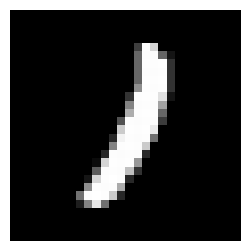

```python
# Function to display cluster center
def displayClusterCenter(n_clusters, model, shapex, shapey):
# ...
# ...
# ...
# ...

# Unlabeled clustering
# ...
# ...
# ...
# ...
```